In [1]:
import pandas as pd

In [92]:
cnn = pd.read_csv('results_cnn_lstm.csv', index_col=0)[['text','labels','CNN_olid_small', 'CNN_hasoc']]
bilstm = pd.read_csv('results_cnn_lstm.csv', index_col=0)[['text','labels','BiLSTM_olid_small', 'BiLSTM_hasoc']]
transformers = pd.read_csv('results_transformers.csv', index_col=0)

olid = pd.read_excel('testDataOlidSmall.xlsx', header=1, index_col=2).iloc[:,2:]
olid.rename(columns = {'pred_naive': 'NB_olid_small', 'pred_svm': 'SVM_olid_small'}, inplace=True)

hasoc = pd.read_excel('testDataHasoc.xlsx', header=1, index_col=2).iloc[:,2:]
hasoc.rename(columns = {'pred_naive': 'NB_hasoc', 'pred_svm': 'SVM_hasoc'}, inplace=True)

In [100]:
results = pd.concat([cnn, bilstm.iloc[:, 2:], transformers.iloc[:, 2:], olid.iloc[:, 2:], hasoc.iloc[:, 2:]], axis=1)
results.to_csv('results.csv')

In [101]:
results

,text,labels,CNN_olid_small,CNN_hasoc,BiLSTM_olid_small,BiLSTM_hasoc,roberta_olid_small,hateBERT_olid_small,roberta_hasoc,hateBERT_hasoc,NB_olid_small,SVM_olid_small,NB_hasoc,SVM_hasoc
15923,# WhoIsQ # WheresTheServer #...,1,1,1,0,0,1,0,1,1,1,1,0,1
27014,# ConstitutionDay is revered by Conserv...,0,1,0,1,0,0,0,0,0,0,0,0,0
30530,# FOXNews # NRA # MAGA ...,0,0,1,0,0,0,0,0,0,0,0,0,0
13876,# Watching # Boomer getting the ...,0,0,0,0,0,0,0,0,0,0,0,1,1
60133,# NoPasaran : Unity demo to oppo...,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73439,# DespicableDems lie again about rifles...,1,0,0,0,0,1,1,0,0,0,0,0,0
25657,# MeetTheSpeakers 🙌 @ USER will ...,0,0,0,0,0,0,0,0,0,0,0,0,0
67018,3 people just unfollowed me for talking about ...,1,1,1,1,1,0,1,0,0,1,1,0,1
50665,# WednesdayWisdom Antifa calls the righ...,0,0,0,0,0,1,1,1,1,1,1,1,1


In [96]:
results = pd.read_csv('results.csv', index_col=0)

In [10]:
from statsmodels.stats.inter_rater import fleiss_kappa

In [36]:
results['pred1'] = results.loc[:,'labels':'SVM_hasoc'].sum(axis=1)
results['pred0'] = -(results.loc[:,'labels':'SVM_hasoc']-1).sum(axis=1)

In [48]:
fleiss_kappa(results.loc[:,['pred1', 'pred0']])

0.28510619141005333

<AxesSubplot:ylabel='Frequency'>

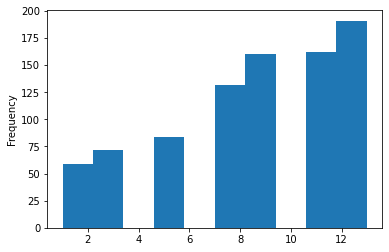

In [65]:
results['diff'] = abs(results.loc[:,'pred0'] - results.loc[:,'pred1'])
results['diff'].plot.hist()

In [67]:
results[results['diff'] == 1]

,text,labels,CNN_olid_small,CNN_hasoc,BiLSTM_olid_small,BiLSTM_hasoc,roberta_olid_small,hateBERT_olid_small,roberta_hasoc,hateBERT_hasoc,NB_olid_small,SVM_olid_small,NB_hasoc,SVM_hasoc,pred1,pred0,diff
65507,@USER Do you get the feeling he is kissing @US...,1,0,0,0,1,1,0,1,1,0,0,0,1,6,7,1
70569,......bitch what URL,1,0,0,0,0,0,1,0,0,1,1,1,1,6,7,1
59200,#Georgetown Classmate Says #Left Accuser is Ab...,0,1,0,1,0,0,0,1,1,1,1,0,1,7,6,1
51628,#Conservatives @USER - You're a clown! URL,1,0,0,0,0,1,1,1,1,0,0,0,1,6,7,1
40386,@USER @USER @USER @USER Then why aren’t there ...,1,0,0,0,0,1,1,1,1,1,0,0,0,6,7,1
39752,@USER Well she is Chuck Schumer's cousin or ni...,0,0,0,0,1,1,1,1,1,0,0,1,1,7,6,1
98916,#ANTIFA are bedfellows with The Democratic Soc...,1,1,0,0,0,0,0,1,1,0,0,1,1,6,7,1
73516,$10 Million reallocated from FEMA to ICE. This...,1,1,0,0,0,1,1,1,1,0,1,0,0,7,6,1
88905,#FortniteBattleRoyale #XboxShare @USER Pleas...,1,0,0,0,0,1,1,1,1,0,0,0,1,6,7,1
90362,#SerenaWilliams Serena was caught cheating wit...,0,0,0,1,1,1,1,0,0,1,1,0,1,7,6,1


In [62]:
resultsresults[results['labels'] == 1].loc[:,'labels']

15923    1
60133    1
83681    1
65507    1
12588    1
        ..
22569    1
48938    1
41438    1
73439    1
67018    1
Name: labels, Length: 240, dtype: int64

In [84]:
sum(results['CNN_olid_small'] == 1)

189

In [86]:
cnn

,text,labels,CNN_olid_small,CNN_hasoc
id,,,,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1,1,0
27014,"#ConstitutionDay is revered by Conservatives, ...",0,1,0
30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0,0,0
13876,#Watching #Boomer getting the news that she is...,0,0,0
60133,#NoPasaran: Unity demo to oppose the far-right...,1,0,0
...,...,...,...,...
73439,#DespicableDems lie again about rifles. Dem Di...,1,0,0
25657,#MeetTheSpeakers 🙌 @USER will present in our e...,0,0,0
67018,3 people just unfollowed me for talking about ...,1,1,0
